## Elower distriibution of Recent databases

In [10]:
from exojax.spec.api import MdbExomol
from exojax.utils.grids import wavenumber_grid
import numpy as np


nus, wav, r = wavenumber_grid(16370, 16390, 20000, unit="AA",xsmode="premodit")
mdbCH4 = MdbExomol("/home/kawahara/.database/CH4/12C-1H4/YT34to10/",nus)


xsmode assumes ESLOG in wavenumber space: mode=premodit
Background atmosphere:  H2
Reading /home/kawahara/.database/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__06100-06200.trans.bz2
.broad is used.
Broadening code level= a1
default broadening parameters are used for  28  J lower states in  45  states


In [15]:
mdbH2O = MdbExomol("/home/kawahara/.database/H2O/1H2-16O/POKAZATEL/",nus)

Background atmosphere:  H2
Error: Couldn't download .broad file at http://www.exomol.com/db/H2O/1H2-16O/1H2-16O__air.broad and save.
Note: Caching states data to the vaex format. After the second time, it will become much faster.
Reading /home/kawahara/.database/H2O/1H2-16O/POKAZATEL/1H2-16O__POKAZATEL__06100-06200.trans.bz2
Note: Caching line transition data to the vaex format. After the second time, it will become much faster.
.broad is used.
Broadening code level= a1
default broadening parameters are used for  12  J lower states in  63  states


In [33]:
from exojax.spec.api import MdbHitemp
mdbH2Oh = MdbHitemp("/home/kawahara/.database/H2O/H2O",nus)

HITEMP keep only relevant input files: []
Added HITEMP-{molecule} database in /home/kawahara/radis.json
HITEMP keep only relevant input files: ['/home/kawahara/.database/H2O/H2O-01_06000-06500_HITEMP2010.hdf5']


In [36]:
mdbCH4h = MdbHitemp("/home/kawahara/.database/CH4/CH4",nus)

Download complete. Parsing CH4 database to /home/kawahara/.database/CH4/CH4-06_HITEMP2020.hdf5

['/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00000.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00001.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00002.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00003.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00004.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00005.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00006.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00007.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00008.hdf5', '/home/kawahara/.database/H2O-01_06000-06500_HITEMP2010_temp00009.hdf5']
Added HITEMP-{molecule} database in /home/kawahara/radis.json


In [62]:
nusx, wavx, rx = wavenumber_grid(22920, 23420, 10000, unit="AA",xsmode="premodit")
mdbCO = MdbExomol("/home/kawahara/.database/CO/12C-16O/Li2015/",nusx, crit=0.0)


xsmode assumes ESLOG in wavenumber space: mode=premodit
Background atmosphere:  H2
Reading /home/kawahara/.database/CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2


/home/kawahara/anaconda3/lib/python3.8/site-packages/exojax-1.2-py3.8.egg/exojax/utils/grids.py:123: UserWarning: Resolution may be too small. R=463335.67821601615
  warnings.warn('Resolution may be too small. R=' + str(resolution),


.broad is used.
Broadening code level= a0
default broadening parameters are used for  71  J lower states in  152  states


In [63]:
len(mdbCO.elower)

718

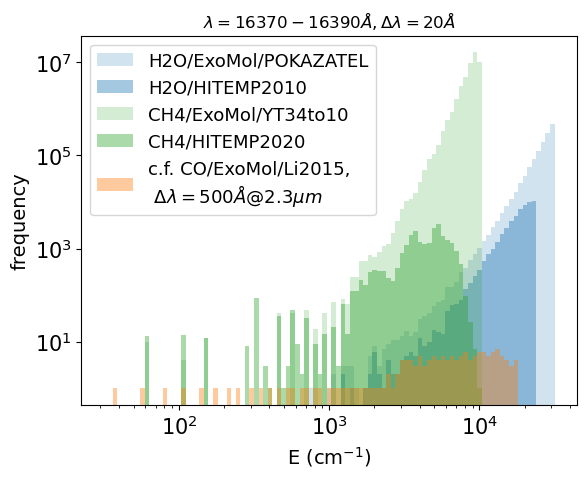

In [96]:
import matplotlib.pyplot as plt
logbin=np.logspace(1.5,4.5,100)
plt.hist((mdbH2O.elower),bins=logbin, log=True,alpha=0.2,label="H2O/ExoMol/POKAZATEL",color="C0")
plt.hist((mdbH2Oh.elower),bins=logbin, log=True,alpha=0.4,label="H2O/HITEMP2010",color="C0")
plt.hist((mdbCH4.elower),bins=logbin, log=True,alpha=0.2,label="CH4/ExoMol/YT34to10",color="C2")
plt.hist((mdbCH4h.elower),bins=logbin, log=True,alpha=0.4,label="CH4/HITEMP2020",color="C2")
plt.hist((mdbCO.elower),bins=logbin, log=True,alpha=0.4,label="c.f. CO/ExoMol/Li2015, \n $\\Delta \\lambda = 500 \\AA$@2.3$\\mu m$",color="C1")
plt.title("$\\lambda = 16370 - 16390 \\AA,  \\Delta \\lambda = 20 \\AA$")
plt.xlabel("E ($\mathrm{cm^{-1}}$)",fontsize=14)
plt.ylabel("frequency",fontsize=14)
plt.legend(fontsize=13)
plt.xscale("log")
plt.tick_params(labelsize=15)
#plt.savefig("elower_distribution.png")
plt.savefig("elower_distribution.png", bbox_inches="tight", pad_inches=0.03)
plt.show()

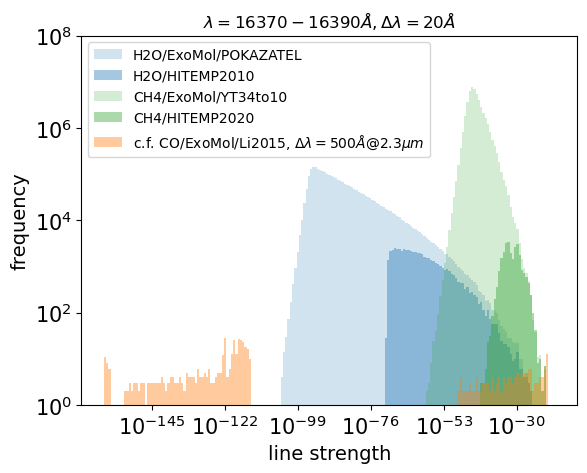

In [110]:
logbin=np.logspace(-160,-18,200)
plt.hist((mdbH2O.Sij0),bins=logbin, log=True,alpha=0.2,label="H2O/ExoMol/POKAZATEL",color="C0")
plt.hist((mdbH2Oh.Sij0),bins=logbin, log=True,alpha=0.4,label="H2O/HITEMP2010",color="C0")
plt.hist((mdbCH4.Sij0),bins=logbin, log=True,alpha=0.2,label="CH4/ExoMol/YT34to10",color="C2")
plt.hist((mdbCH4h.Sij0),bins=logbin, log=True,alpha=0.4,label="CH4/HITEMP2020",color="C2")
plt.hist((mdbCO.Sij0),bins=logbin, log=True,alpha=0.4,label="c.f. CO/ExoMol/Li2015, $\\Delta \\lambda = 500 \\AA$@2.3$\\mu m$",color="C1")
plt.title("$\\lambda = 16370 - 16390 \\AA,  \\Delta \\lambda = 20 \\AA$")
plt.xlabel("line strength",fontsize=14)
plt.ylabel("frequency",fontsize=14)
plt.legend(fontsize=10, loc="upper left")
plt.ylim(1,10**8)
plt.xscale("log")
plt.tick_params(labelsize=15)
#plt.savefig("elower_distribution.png")
plt.savefig("linestrength_distribution.png", bbox_inches="tight", pad_inches=0.03)
plt.show()

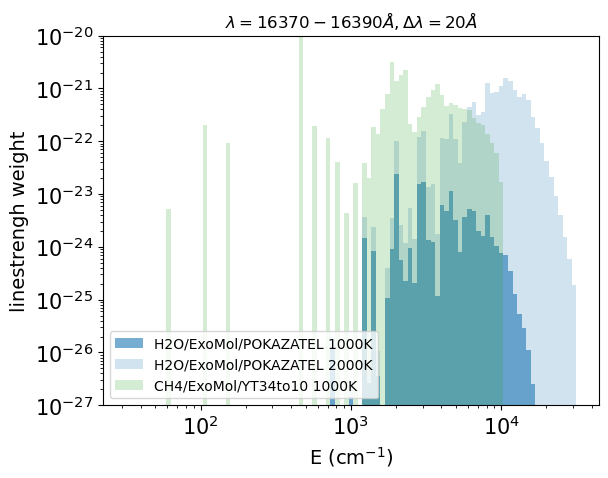

In [133]:
from exojax.utils.constants import hcperk, Tref
def East(T):
    return -1. / (hcperk * (1. / T - 1. / Tref))

Tf=1000
Th=2000
logbin=np.logspace(1.5,4.5,100)
plt.hist((mdbH2O.elower),bins=logbin, weights=mdbH2O.Sij0*np.exp(mdbH2O.elower/East(Tf)), log=True,alpha=0.6,label="H2O/ExoMol/POKAZATEL "+str(Tf)+"K",color="C0")
plt.hist((mdbH2O.elower),bins=logbin, weights=mdbH2O.Sij0*np.exp(mdbH2O.elower/East(Th)), log=True,alpha=0.2,label="H2O/ExoMol/POKAZATEL "+str(Th)+"K",color="C0")
#plt.hist((mdbH2Oh.elower),bins=logbin, weights=mdbH2Oh.Sij0*np.exp(mdbH2Oh.elower/East(Tf)), log=True,alpha=0.4,label="H2O/HITEMP2010",color="C0")
plt.hist((mdbCH4.elower),bins=logbin, weights=mdbCH4.Sij0*np.exp(mdbCH4.elower/East(Tf)), log=True,alpha=0.2,label="CH4/ExoMol/YT34to10 "+str(Tf)+"K",color="C2")
#plt.hist((mdbCH4h.elower),bins=logbin, weights=mdbCH4h.Sij0*np.exp(mdbCH4h.elower/East(Tf)), log=True,alpha=0.4,label="CH4/HITEMP2020",color="C2")
#plt.hist((mdbCO.elower),bins=logbin, weights=mdbCO.Sij0*np.exp(mdbCO.elower/East(Tf)), log=True,alpha=0.4,label="c.f. CO/ExoMol/Li2015, \n $\\Delta \\lambda = 500 \\AA$@2.3$\\mu m$",color="C1")
plt.title("$\\lambda = 16370 - 16390 \\AA,  \\Delta \\lambda = 20 \\AA$")
plt.ylabel("linestrengh weight",fontsize=14)
plt.xlabel("E ($\mathrm{cm^{-1}}$)",fontsize=14)
plt.legend(fontsize=10, loc="lower left")
plt.xscale("log")
plt.ylim(10**-27,10**-20)
plt.tick_params(labelsize=15)
#plt.savefig("elower_distribution.png")
plt.savefig("elower_weighted_distribution.png", bbox_inches="tight", pad_inches=0.03)
plt.show()


## Nline in 100 AA @ 1.64um is approximately 10^8

In [83]:
nusa, wava, ra = wavenumber_grid(16350, 16450, 1000, unit="AA",xsmode="premodit")
mdbCH4a = MdbExomol("/home/kawahara/.database/CH4/12C-1H4/YT34to10/",nusa)


xsmode assumes ESLOG in wavenumber space: mode=premodit
Background atmosphere:  H2
Reading /home/kawahara/.database/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__06000-06100.trans.bz2
Reading /home/kawahara/.database/CH4/12C-1H4/YT34to10/12C-1H4__YT34to10__06100-06200.trans.bz2


/home/kawahara/anaconda3/lib/python3.8/site-packages/exojax-1.2-py3.8.egg/exojax/utils/grids.py:123: UserWarning: Resolution may be too small. R=163835.49237683107
  warnings.warn('Resolution may be too small. R=' + str(resolution),


.broad is used.
Broadening code level= a1
default broadening parameters are used for  28  J lower states in  45  states


In [84]:
print(len(mdbCH4a.elower))

103357323


In [140]:
East(2000), East(1000.0)

(241.46740943017846, 292.2304443672046)

22026.465794806718

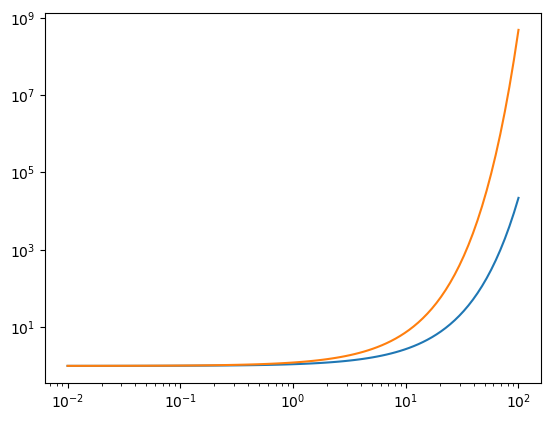

In [146]:
x=np.logspace(-2,2,100)
plt.plot(x,np.exp(x/10))
plt.plot(x,np.exp(x/5))
plt.yscale("log")
plt.xscale("log")
#plt.ylim(10**-10,10**2)
np.exp(10)

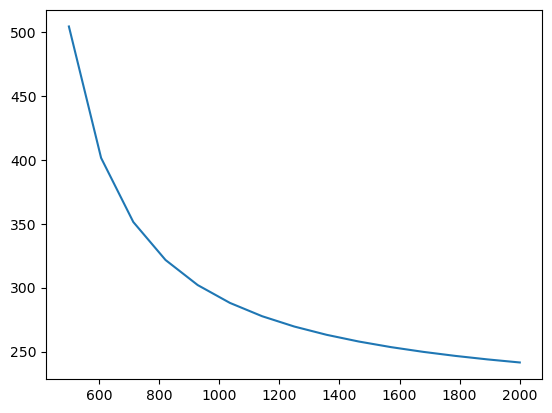

In [141]:
Tarr=np.linspace(500,2000,15)
plt.plot(Tarr, East(Tarr))

In [152]:
np.exp(2.3)/np.exp(0)

9.974182454814718